# 2. 카메라 스티커앱 만들기 첫걸음 [프로젝트]

In [1]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# 필요한 패키지 import 하기
import os
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리
print("🌫🛸")

🌫🛸


In [3]:
# 사진 파일의 경로를 적절히 설정한다.
# 사진 속 모델: 장원영, 카리나, 차은우, 뷔

cwd = os.getcwd()
image1_path = f'{cwd}/drive/MyDrive/aiffel/Ex03/img01.jpg'
image2_path = f'{cwd}/drive/MyDrive/aiffel/Ex03/img02.jpg'
image3_path = f'{cwd}/drive/MyDrive/aiffel/Ex03/img03.jpg'
image4_path = f'{cwd}/drive/MyDrive/aiffel/Ex03/img04.jpg'
cat_whiskers_path = f'{cwd}/drive/MyDrive/aiffel/Ex03/cat-whiskers.png'
model_path = f'{cwd}/drive/MyDrive/aiffel/Ex03/shape_predictor_68_face_landmarks.dat'

### image1_path부터 image4_path까지 네 가지 이미지 중, 원하는 이미지를 하나 불러온다.

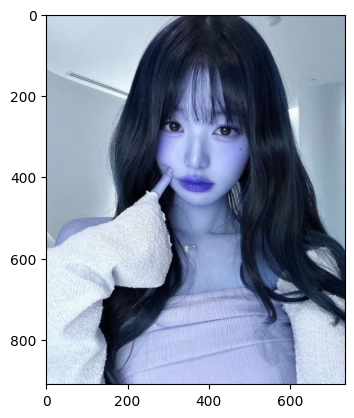

In [4]:
img_bgr = cv2.imread(image1_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

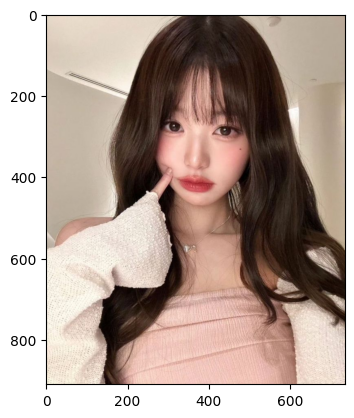

In [5]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

## Face Detection


In [6]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
print("🌫🛸")

🌫🛸


In [7]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(266, 242) (489, 464)]]


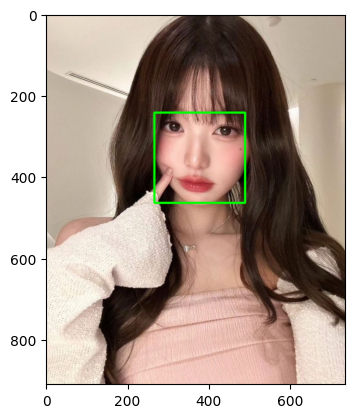

In [8]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 4, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## Face Landmark

In [9]:
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄
print("🌫🛸")

🌫🛸


In [10]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


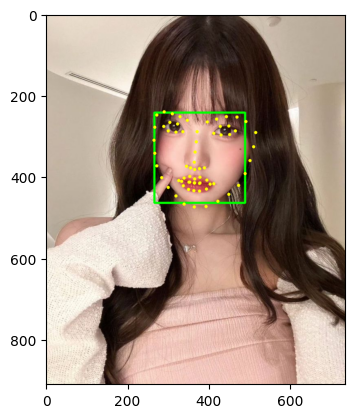

In [11]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 4, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

In [12]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print ("코 부위의 좌표:",landmark[30]) # 코의 index는 30 입니다.

    # 고양이의 수염 이미지의 중심은 코의 위치와 동일하다.
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] # 이미지에서 코 부위의 y값

    w = h = dlib_rect.width() # 얼굴 영역의 가로와 세로를 차지하는 픽셀의 수, border의 너비와 높이와 같다.
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

코 부위의 좌표: (364, 364)
(x,y) : (364,364)
(w,h) : (224,224)


In [13]:
# 좌우 눈동자의 좌표값으로 고개가 돌아간 각도를 구하고, 구한 각도만큼 수염을 돌려보도록 하자.

# 37 좌측 눈의 인덱스
# 44 우측 눈의 인덱스

import math

def calculate_angle(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    # print(x1, y1, x2, y2)
    angle_radians = math.atan2(dy, dx)
    angle_degrees = math.degrees(angle_radians)

    # 각도를 0에서 360도 사이의 값으로 정규화
    if angle_degrees < 0:
        angle_degrees += 360

    return 360 - angle_degrees

# 예시 사용
angle = calculate_angle(landmark[39][0],landmark[39][1], landmark[42][0],landmark[42][1])
print("x축 선과 좌우 눈을 지나는 선의 각도", angle)

x축 선과 좌우 눈을 지나는 선의 각도 356.98721249581666


## Add Sticker to the Image

In [14]:
img_sticker = cv2.imread(cat_whiskers_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수 // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print(img_sticker.shape) # 사이즈를 조정한 스티커 이미지의 차원 확인

(224, 224, 3)


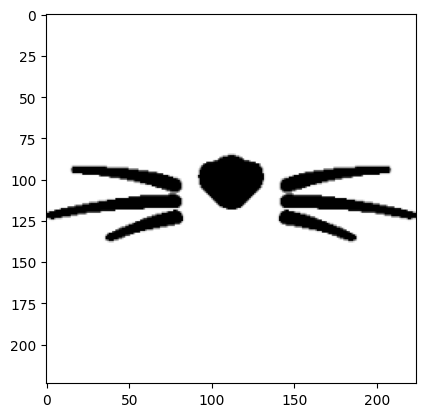

In [15]:
# show img_sticker
plt.imshow(img_sticker)
# 이미지를 준비
plt.show()

돌린 이미지의 차원 확인: (224, 224, 3)


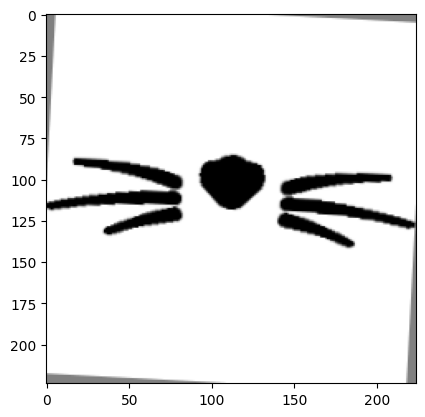

In [16]:
# 스티커를 얼굴 고개 각도에 맞게 돌린다. 돌린 후 생기는 여백은 회색으로 처리한다.

# Read the image
image = cv2.imread(cat_whiskers_path, cv2.IMREAD_UNCHANGED)
image = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)

image = cv2.resize(image, (w,h))
print("돌린 이미지의 차원 확인:",image.shape) # 돌린 이미지의 차원 확인

# # Get the image size
# (h, w) = image.shape[:2]

# Calculate the center of the image
center = (w // 2, h // 2)

# Specify the rotation angle (e.g., 45 degrees)

# Generate the rotation matrix
M = cv2.getRotationMatrix2D(center, angle, 1.0)

# Apply the rotation to the image
rotated_sticker = cv2.warpAffine(image, M, (w, h), borderMode=cv2.BORDER_CONSTANT, borderValue=(128,128,128))
plt.imshow(rotated_sticker)
plt.show()


In [17]:
rotated_sticker.shape

(224, 224, 3)

In [18]:
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
# x는 이미지에서 코 부위의 x값
# y는 이미지에서 코 부위의 y값
# w는 얼굴 영역의 가로를 차지하는 픽셀의 수
# h는 얼굴 영역의 가로를 차지하는 픽셀의 수
refined_x = x - w // 2
refined_y = y - w // 2
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 스티커 이미지가 시작됨
print (f'(refined_x,refined_y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남
# 우리는 현재 이마 자리에 스티커을 두고 싶은건데, 이마위치 - 스티커 높이를 했더니 이미지의 범위를 초과하여 음수가 나오는 것
# opencv는 ndarray데이터를 사용하는데, ndarray는 음수인덱스에 접근 불가하므로 스티커 이미지를 잘라 줘야 한다.

(refined_x,refined_y) : (252,252)


In [19]:
# 스티커 이미지가 이미지 밖에서 시작하지 않도록 조정이 필요함
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# 현재 상황에서는 -y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.
# 음수값 만큼 스티커 이미지를 자른다.
if refined_x < 0:
    rotated_sticker = rotated_sticker[:, -refined_x:]
    refined_x = 0
# 스티커 이미지를 씌우기 위해 스티커 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    rotated_sticker = rotated_sticker[-refined_y:, :]
    refined_y = 0

print (f'(refined_x, refined_y) : ({refined_x},{refined_y})')

(refined_x, refined_y) : (252,252)


In [20]:
# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지 입니다.
sticker_area = img_show[refined_y:refined_y+rotated_sticker.shape[0], refined_x:refined_x+rotated_sticker.shape[1]]
# print(len(sticker_area))

# 스티커 이미지에서 사용할 부분은 수염의 검은색이 있는 부분을 사용합니다.
# 회전 후 여백의 회색 이미지도 잘라야한다. 적절한 값을 10으로 설정하였다.

img_show[refined_y:refined_y+rotated_sticker.shape[0], refined_x:refined_x+rotated_sticker.shape[1]] = \
    np.where(rotated_sticker>10,sticker_area,rotated_sticker).astype(np.uint8)

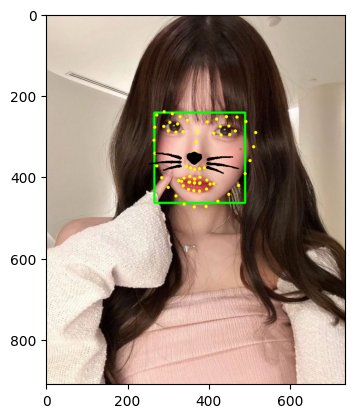

In [21]:
# 왕관 이미지를 적용한 이미지를 보여준다.
# 얼굴 영역과 랜드마크를 미리 적용해놓은 img_show에 스티커 이미지를 덧붙인 이미지가 나오게 된다.)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

## 원본 이미지와 스티커를 적용한 이미지 비교

224


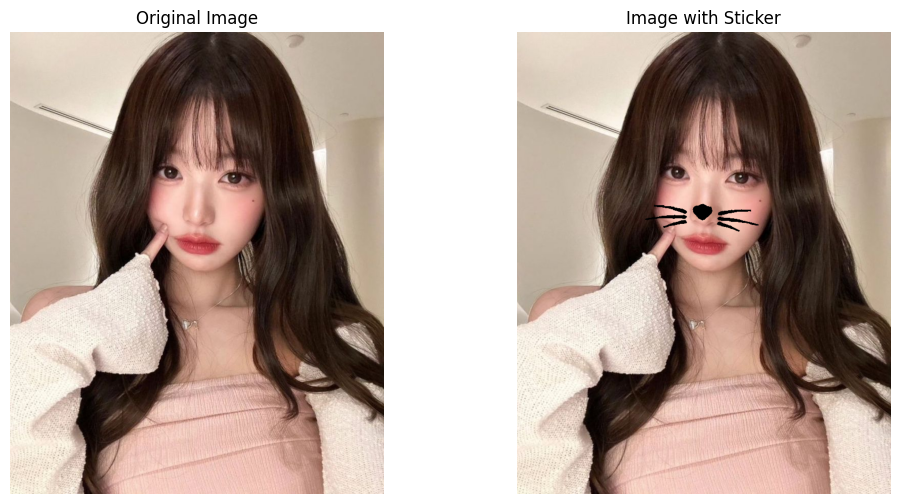

In [22]:
# 원본 이미지에 스티커만 붙여보자.
raw_img = img_bgr
raw_img_rgb = cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB)

# Create a figure with 1 row and 2 columns of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(raw_img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌
ax1.set_title('Original Image')
ax1.axis('off')

sticker_area = raw_img_rgb[refined_y:refined_y+rotated_sticker.shape[0], refined_x:refined_x+rotated_sticker.shape[1]]
print(len(sticker_area))

raw_img_rgb[refined_y:refined_y+rotated_sticker.shape[0], refined_x:refined_x+rotated_sticker.shape[1]] = \
    np.where(rotated_sticker>10,sticker_area,rotated_sticker).astype(np.uint8)

ax2.imshow(raw_img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
ax2.set_title('Image with Sticker')
ax2.axis('off')
plt.show()

## 완성! 이제 모든 사진에 대해서 스티커를 적용한다.

In [23]:
def apply_cat_whiskers(image_path, cat_whiskers_path, model_path):
    """Applies cat whiskers sticker to a face in an image.

    Args:
        image_path: Path to the input image.
        cat_whiskers_path: Path to the cat whiskers sticker image.
        model_path: Path to the face landmark detection model.

    Returns:
        The image with the cat whiskers sticker applied.
    """

    # Load the input image
    img_bgr = cv2.imread(image_path)
    img_show = img_bgr.copy()
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # Detect faces using dlib's HOG-based detector
    detector_hog = dlib.get_frontal_face_detector()
    dlib_rects = detector_hog(img_rgb, 1)

    # If no face is detected, return the original image
    if not dlib_rects:
        return img_bgr

    # Detect landmarks for each face
    landmark_predictor = dlib.shape_predictor(model_path)
    list_landmarks = []
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)

    # Apply cat whiskers sticker to each face
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        x = landmark[30][0]
        y = landmark[30][1]
        w = h = dlib_rect.width()

        # Calculate angle for sticker rotation
        angle = calculate_angle(landmark[39][0], landmark[39][1], landmark[42][0], landmark[42][1])

        # Load and rotate the sticker image
        img_sticker = cv2.imread(cat_whiskers_path, cv2.IMREAD_UNCHANGED)
        img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGRA2BGR)
        img_sticker = cv2.resize(img_sticker, (w, h))
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, angle, 1.0)
        rotated_sticker = cv2.warpAffine(img_sticker, M, (w, h), borderMode=cv2.BORDER_CONSTANT, borderValue=(128, 128, 128))

        # Adjust sticker position to avoid out-of-bounds errors
        refined_x = x - w // 2
        refined_y = y - w // 2
        if refined_x < 0:
            rotated_sticker = rotated_sticker[:, -refined_x:]
            refined_x = 0
        if refined_y < 0:
            rotated_sticker = rotated_sticker[-refined_y:, :]
            refined_y = 0

        # Apply the sticker to the image
        sticker_area = img_show[refined_y:refined_y + rotated_sticker.shape[0], refined_x:refined_x + rotated_sticker.shape[1]]
        img_show[refined_y:refined_y + rotated_sticker.shape[0], refined_x:refined_x + rotated_sticker.shape[1]] = \
            np.where(rotated_sticker > 10, sticker_area, rotated_sticker).astype(np.uint8)

    return img_show

In [24]:
image_paths = [image1_path, image2_path, image3_path, image4_path]
results = []

for image_path in image_paths:
    result_image = apply_cat_whiskers(image_path, cat_whiskers_path, model_path)
    results.append(result_image)

In [25]:
# for i, result_image in enumerate(results):
#     plt.figure()
#     plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
#     plt.title(f"Image {i + 1} with Cat Whiskers")
#     plt.show()

#     # Optionally save the image to a file
#     # cv2.imwrite(f"image_{i + 1}_with_cat_whiskers.jpg", result_image)

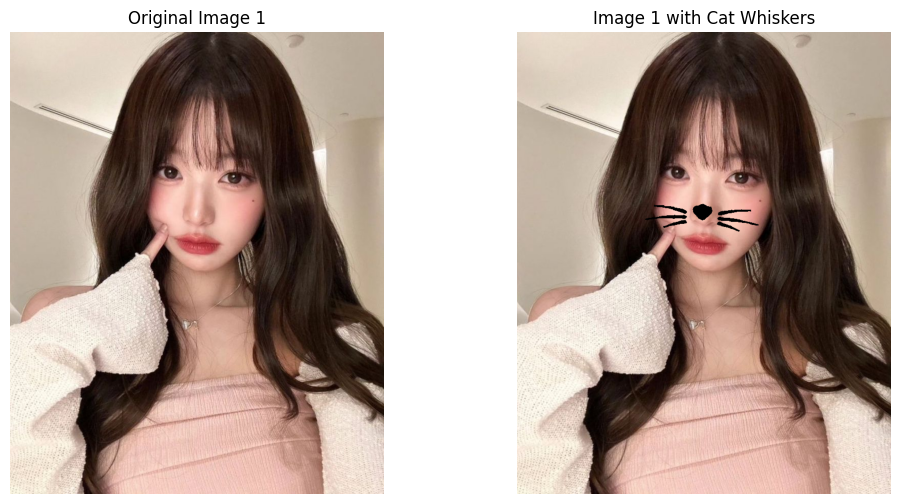

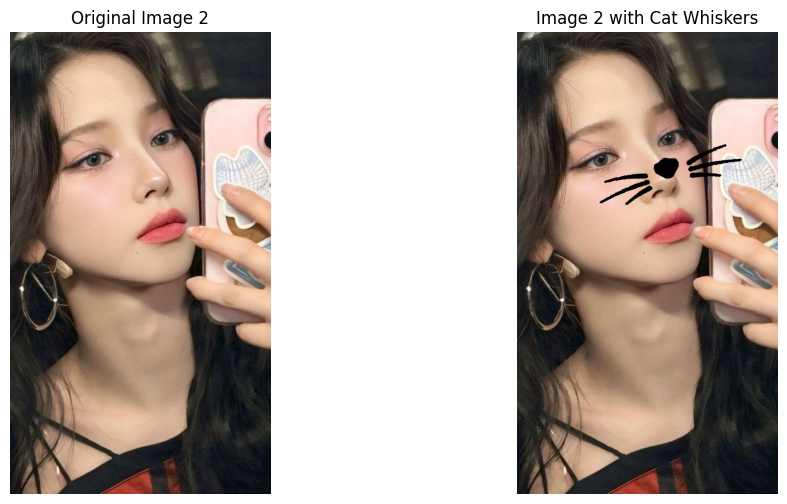

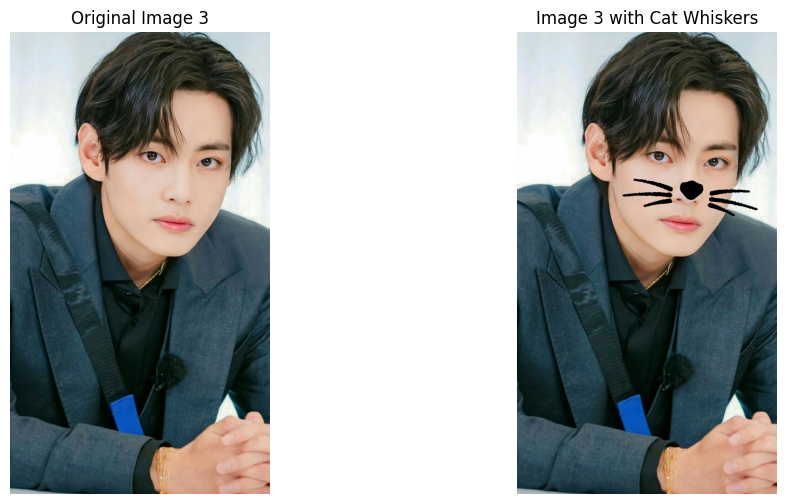

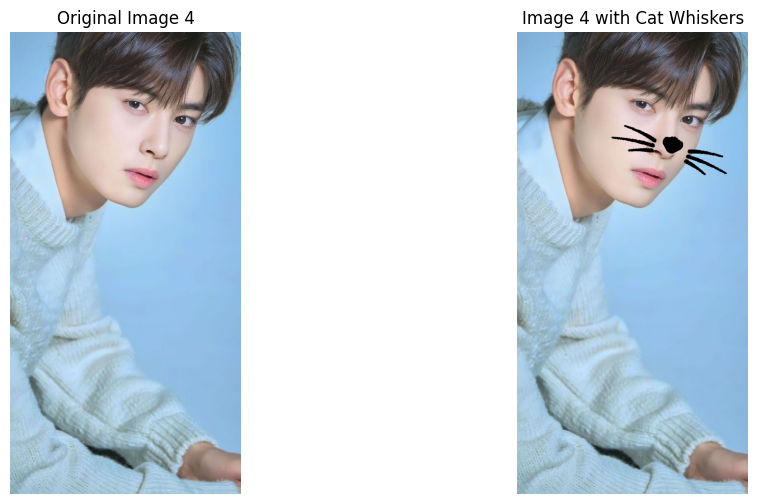

In [26]:
# ... (previous code remains the same)

# Step 3: Display the original and modified images together

import matplotlib.pyplot as plt

for i, (image_path, result_image) in enumerate(zip(image_paths, results)):
    # Load the original image
    original_image = cv2.imread(image_path)
    original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    # Create a figure with 1 row and 2 columns of subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Display the original image
    ax1.imshow(original_image_rgb)
    ax1.set_title(f"Original Image {i + 1}")
    ax1.axis('off')

    # Display the modified image with the cat whiskers
    ax2.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    ax2.set_title(f"Image {i + 1} with Cat Whiskers")
    ax2.axis('off')

    plt.show()

    # Optionally save the images to files
    # cv2.imwrite(f"original_image_{i + 1}.jpg", original_image)
    # cv2.imwrite(f"image_{i + 1}_with_cat_whiskers.jpg", result_image)